* **SentenceTransformer** is used to compute dense vector representations for sentences, paragraphs, and images.


* **sklearn.decomposition.PCA** is **Principle Component Analysis** used for linear dimensionality reduction using single value decomposition of the data to project it to a lower-dimensional space.

In [1]:
#Importing the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

C:\Users\binur\anaconda3\envs\tfradeon\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* **rcParams** - Each time matplotlib loads, it defines a runtime configuration(rc) containing the default styles for every plot element you create. This configuration can be adjusted using any time using the plt.

In [2]:
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [3]:
#Importing the dataset
data = pd.read_csv("D:\\SLIIT\\3rd year 2nd sem\\Information Retrieval and Web Analytics\\Coding\\imdb_top_1000.csv")
data.head(10)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,"37,030,102"


In [4]:
#Exploring the dataset
x = np.array(data.Overview)
x

array(['Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
       "An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.",
       'When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.',
       'The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.',
       'A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence.',
       "Gandalf and Aragorn lead the World of Men against Sauron's army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring.",
       'The lives of two mob hitmen, a boxer, a gangster and his wife, and a pair of diner ban

In [5]:
data = data[['Genre','Overview','Series_Title']]
data.head(10)

,Genre,Overview,Series_Title
0,Drama,Two imprisoned men bond over a number of years...,The Shawshank Redemption
1,"Crime, Drama",An organized crime dynasty's aging patriarch t...,The Godfather
2,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,The Dark Knight
3,"Crime, Drama",The early life and career of Vito Corleone in ...,The Godfather: Part II
4,"Crime, Drama",A jury holdout attempts to prevent a miscarria...,12 Angry Men
5,"Action, Adventure, Drama",Gandalf and Aragorn lead the World of Men agai...,The Lord of the Rings: The Return of the King
6,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Pulp Fiction
7,"Biography, Drama, History","In German-occupied Poland during World War II,...",Schindler's List
8,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Inception
9,Drama,An insomniac office worker and a devil-may-car...,Fight Club


In [6]:
#Converting a text into a vector
text_data = x
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(text_data,show_progress_bar=True)

Batches: 100%|██████████| 32/32 [01:12<00:00,  2.28s/it]


In [7]:
x = np.array(embeddings)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(x)
pca_data = pd.DataFrame(pca.transform(x))
pca_data.head(10)

,0,1,2,3,4
0,2.986178,1.695308,4.334599,-2.355133,2.236975
1,-0.131717,0.887890,4.695467,-2.713843,-1.792315
2,-5.688412,-1.776822,-0.750705,-0.705626,4.125186
3,-1.211429,4.458734,1.582390,-3.536564,-2.345169
4,-0.971367,-2.374322,3.172196,3.073354,-0.171848
5,-5.694694,4.024908,1.181151,1.802953,1.948121
6,-3.344382,-0.007789,-1.386906,-2.950717,-3.253052
7,-1.238983,2.606963,1.966398,1.885784,-0.698227
8,-5.311704,-2.772291,-0.673218,-0.502134,0.258092
9,-2.721867,0.139876,-2.608619,1.971524,2.204212


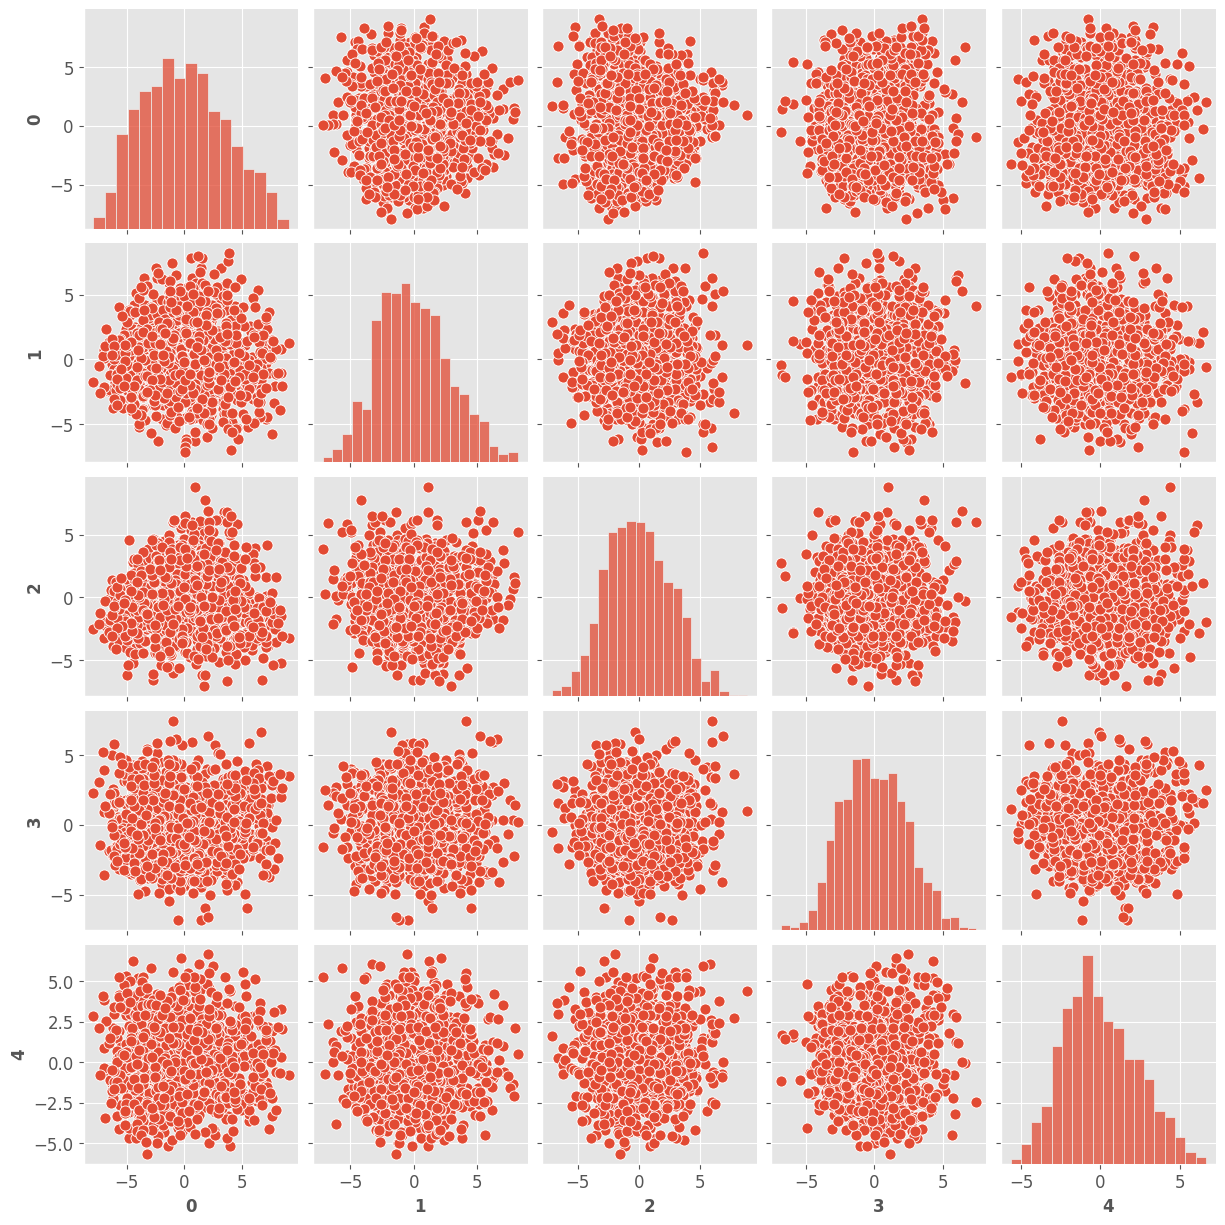

In [8]:
sns.pairplot(pca_data)

In [9]:
#Calculating the cosine similarity
cos_sim_data = pd.DataFrame(cosine_similarity(x))
cos_sim_data

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,0.550392,0.350035,0.421647,0.463879,0.408422,0.515788,0.353916,0.387551,0.317381,...,0.305638,0.366211,0.417200,0.488904,0.500020,0.372190,0.415689,0.435626,0.387703,0.394108
1,0.550392,1.000000,0.500683,0.786400,0.515959,0.494177,0.590944,0.616865,0.669451,0.522402,...,0.572684,0.527550,0.541616,0.561910,0.610282,0.562431,0.462835,0.591016,0.463928,0.667192
2,0.350035,0.500683,1.000000,0.558546,0.485291,0.561352,0.590945,0.544381,0.676872,0.625679,...,0.661857,0.611165,0.603802,0.519504,0.566178,0.445671,0.289652,0.492818,0.425312,0.695630
3,0.421647,0.786400,0.558546,1.000000,0.406723,0.457717,0.692699,0.603844,0.589853,0.588154,...,0.600036,0.524070,0.504667,0.470645,0.616529,0.598617,0.459036,0.541068,0.424762,0.571338
4,0.463879,0.515959,0.485291,0.406723,1.000000,0.492655,0.455883,0.449242,0.564627,0.465197,...,0.435063,0.444267,0.510465,0.526206,0.521250,0.410175,0.308236,0.530084,0.403962,0.613202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.372190,0.562431,0.445671,0.598617,0.410175,0.247875,0.504041,0.528952,0.522887,0.526840,...,0.403573,0.463685,0.461474,0.568742,0.617731,1.000000,0.290021,0.626848,0.394188,0.555140
996,0.415689,0.462835,0.289652,0.459036,0.308236,0.368696,0.568177,0.396030,0.323748,0.351758,...,0.564020,0.374122,0.374286,0.461643,0.425178,0.290021,1.000000,0.418450,0.358423,0.317991
997,0.435626,0.591016,0.492818,0.541068,0.530084,0.438132,0.597036,0.573586,0.574997,0.541618,...,0.587393,0.519467,0.467826,0.600152,0.681106,0.626848,0.418450,1.000000,0.623554,0.574719
998,0.387703,0.463928,0.425312,0.424762,0.403962,0.478383,0.565744,0.569549,0.522156,0.513807,...,0.550375,0.575349,0.347167,0.529319,0.477487,0.394188,0.358423,0.623554,1.000000,0.486595


In [10]:
cos_sim_data = pd.DataFrame(cosine_similarity(x))
def give_recommendations(index,print_recommendation = False,print_recommendation_plots= False,print_genres =False):
    index_recomm =cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]
    movies_recomm =  data['Series_Title'].loc[index_recomm].values
    result = {'Movies':movies_recomm,'Index':index_recomm}
    if print_recommendation==True:
        print('The watched movie is this one: %s \n'%(data['Series_Title'].loc[index]))
        k=1
        for movie in movies_recomm:
            print('The number %i recommended movie is this one: %s \n'%(k,movie))
    if print_recommendation_plots==True:
        print('The plot of the watched movie is this one:\n %s \n'%(data['Overview'].loc[index]))
        k=1
        for q in range(len(movies_recomm)):
            plot_q = data['Overview'].loc[index_recomm[q]]
            print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
            k=k+1
    if print_genres==True:
        print('The genres of the watched movie is this one:\n %s \n'%(data['Genre'].loc[index]))
        k=1
        for q in range(len(movies_recomm)):
            plot_q = data['Genre'].loc[index_recomm[q]]
            print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
            k=k+1
    return result
    

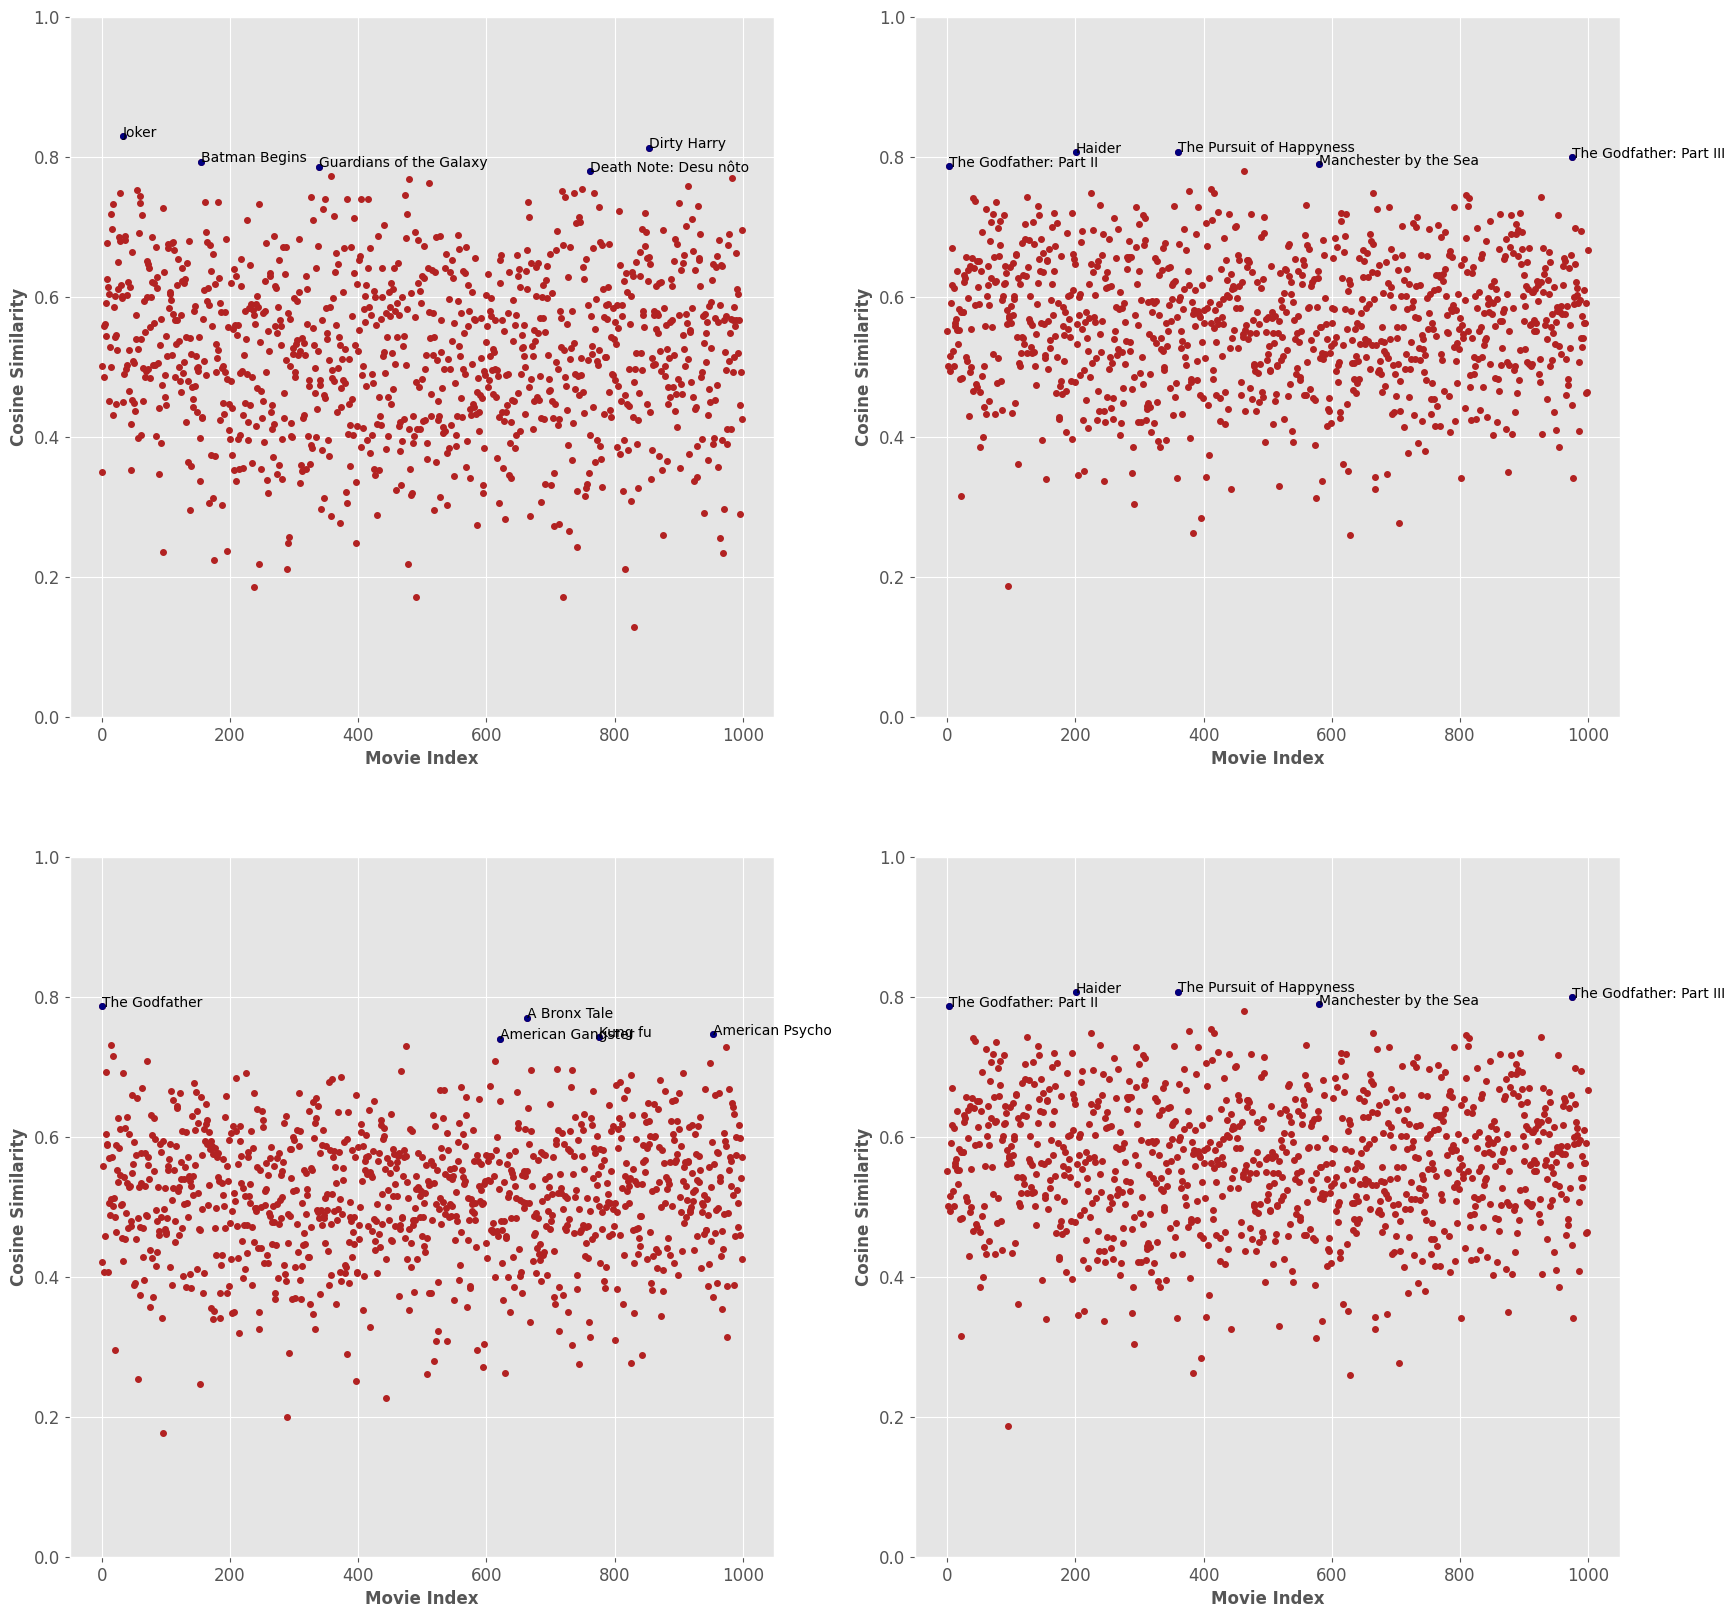

In [21]:
#Plotting recommendations
plt.figure(figsize=(20,20))
for q in range(1,5):
    plt.subplot(2,2,q)
    index = np.random.choice(np.arange(0,len(x))) #choice generates a random sample from a given 1D array
    to_plot_data = cos_sim_data.drop(index,axis=1)
    plt.plot(to_plot_data.loc[index],'.',color='firebrick')
    recomm_index = give_recommendations(index)
    x = recomm_index['Index']
    y = cos_sim_data.loc[index][x].tolist()
    m = recomm_index['Movies']
    plt.plot(x,y,'.',color='navy',label='Recommended Movies')
    #plt.title('Movie Watched: '+data+['Series_Title'].loc[index])
    plt.xlabel('Movie Index')
    k=0
    
    for x_i in x:
        plt.annotate('%s'%(m[k]),(x_i,y[k]),fontsize=10)
        k = k + 1
        
    plt.ylabel('Cosine Similarity')
    plt.ylim(0,1)

In [22]:
give_recommendations(2,True)

The watched movie is this one: The Dark Knight 

The number 1 recommended movie is this one: Joker 

The number 1 recommended movie is this one: Dirty Harry 

The number 1 recommended movie is this one: Batman Begins 

The number 1 recommended movie is this one: Guardians of the Galaxy 

The number 1 recommended movie is this one: Death Note: Desu nôto 



{'Movies': array(['Joker', 'Dirty Harry', 'Batman Begins', 'Guardians of the Galaxy',
        'Death Note: Desu nôto'], dtype=object),
 'Index': [33, 853, 155, 339, 762]}

In [23]:
give_recommendations(2,False,True)

The plot of the watched movie is this one:
 When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice. 

The plot of the number 1 recommended movie is this one:
 In Gotham City, mentally troubled comedian Arthur Fleck is disregarded and mistreated by society. He then embarks on a downward spiral of revolution and bloody crime. This path brings him face-to-face with his alter-ego: the Joker. 

The plot of the number 2 recommended movie is this one:
 When a madman calling himself "the Scorpio Killer" menaces the city, tough-as-nails San Francisco Police Inspector "Dirty" Harry Callahan is assigned to track down and ferret out the crazed psychopath. 

The plot of the number 3 recommended movie is this one:
 After training with his mentor, Batman begins his fight to free crime-ridden Gotham City from corruption. 

The plot of the number 4 recommended movie is t

{'Movies': array(['Joker', 'Dirty Harry', 'Batman Begins', 'Guardians of the Galaxy',
        'Death Note: Desu nôto'], dtype=object),
 'Index': [33, 853, 155, 339, 762]}

In [24]:
give_recommendations(65,True,True,True)

The watched movie is this one: Taare Zameen Par 

The number 1 recommended movie is this one: Jagten 

The number 1 recommended movie is this one: What's Eating Gilbert Grape 

The number 1 recommended movie is this one: Scent of a Woman 

The number 1 recommended movie is this one: The Boy in the Striped Pyjamas 

The number 1 recommended movie is this one: Harry Potter and the Sorcerer's Stone 

The plot of the watched movie is this one:
 An eight-year-old boy is thought to be a lazy trouble-maker, until the new art teacher has the patience and compassion to discover the real problem behind his struggles in school. 

The plot of the number 1 recommended movie is this one:
 A teacher lives a lonely life, all the while struggling over his son's custody. His life slowly gets better as he finds love and receives good news from his son, but his new luck is about to be brutally shattered by an innocent little lie. 

The plot of the number 2 recommended movie is this one:
 A young man in a 

{'Movies': array(['Jagten', "What's Eating Gilbert Grape", 'Scent of a Woman',
        'The Boy in the Striped Pyjamas',
        "Harry Potter and the Sorcerer's Stone"], dtype=object),
 'Index': [88, 658, 398, 616, 947]}

In [28]:
#Storing the recommendations into a dataframe
recomm_list = []
for i in range(len(x)):
    recomm_i = give_recommendations(i)
    recomm_list.append(recomm_i['Movies'])
recomm_data = pd.DataFrame(recomm_list,columns=['First Recommendation','Second Recommendation','Third Recommendation','Fourth Recommendation','Fifth Recommendation'])
recomm_data['Watched Movie'] = data['Series_Title']
recomm_data = recomm_data[['Watched Movie','First Recommendation','Second Recommendation','Third Recommendation','Fourth Recommendation','Fifth Recommendation']]

In [29]:
recomm_data.sample(frac=1).head()

,Watched Movie,First Recommendation,Second Recommendation,Third Recommendation,Fourth Recommendation,Fifth Recommendation
3,The Godfather: Part II,The Godfather,A Bronx Tale,American Psycho,Kung fu,American Gangster
2,The Dark Knight,Joker,Dirty Harry,Batman Begins,Guardians of the Galaxy,Death Note: Desu nôto
4,12 Angry Men,La passion de Jeanne d'Arc,The Verdict,Nelyubov,A Few Good Men,"Three Billboards Outside Ebbing, Missouri"
0,The Shawshank Redemption,Fa yeung nin wah,Drishyam,El secreto de sus ojos,Eskiya,Seven Pounds
1,The Godfather,The Pursuit of Happyness,Haider,The Godfather: Part III,Manchester by the Sea,The Godfather: Part II
